In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("data/stud.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math score'])
y = df['math score']


In [4]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3


In [6]:
x = df.drop(columns=['math score'])
y = df['math score']


In [7]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("onehot", oh_transformer, cat_features),
        ("num", numeric_transformer, num_features)
    ]
)


C:\Users\asing\AppData\Local\Temp\ipykernel_1340\1468940673.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_features = X.select_dtypes(include='object').columns


In [9]:
x = preprocessor.fit_transform(x)

In [10]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [11]:
x.shape

(1000, 19)

In [12]:
# seperate train ,test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

In [15]:
def evaluate_model(true, predicted):
    r2 = r2_score(true, predicted)
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square=r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [17]:
models={
    "Linear Regression": LinearRegression(),
    "lasso Regression": Lasso(),
    "ridge Regression": Ridge(),
    "k-nearest neighbors": KNeighborsRegressor(),
    "decision tree": DecisionTreeRegressor(),
    "random forest": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    }
model_list=[]
r2_list=[]

for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae,model_train_mse,model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set:')
    print("- Root Mean Squared Error:{:.4f}".format(model_train_rmse))
    print("- Mean Squared Error:{:.4f}".format(model_train_mse))
    print("- Mean Absolute Error:{:.4f}".format(model_train_mae))
    print("- R2 Score:{:.4f}".format(model_train_r2))
    
    print('--------------------------------')
    
    print('Model performance for test set:')
    print("- Root Mean Squared Error:{:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error:{:.4f}".format(model_test_mae))
    print("- R2 Score:{:.4f}".format(model_test_r2))  
    
    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')
        

Linear Regression
Model performance for training set:
- Root Mean Squared Error:5.3231
- Mean Squared Error:28.3349
- Mean Absolute Error:4.2667
- R2 Score:0.8743
--------------------------------
Model performance for test set:
- Root Mean Squared Error:5.3940
- Mean Absolute Error:4.2148
- R2 Score:0.8804


lasso Regression
Model performance for training set:
- Root Mean Squared Error:6.5938
- Mean Squared Error:43.4784
- Mean Absolute Error:5.2063
- R2 Score:0.8071
--------------------------------
Model performance for test set:
- Root Mean Squared Error:6.5197
- Mean Absolute Error:5.1579
- R2 Score:0.8253


ridge Regression
Model performance for training set:
- Root Mean Squared Error:5.3233
- Mean Squared Error:28.3378
- Mean Absolute Error:4.2650
- R2 Score:0.8743
--------------------------------
Model performance for test set:
- Root Mean Squared Error:5.3904
- Mean Absolute Error:4.2111
- R2 Score:0.8806


k-nearest neighbors
Model performance for training set:
- Root Mean Squa

In [18]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2_score']).sort_values(by='R2_score',ascending=False)

,Model,R2_score
2,ridge Regression,0.880593
0,Linear Regression,0.880433
5,random forest,0.853778
8,AdaBoostRegressor,0.852281
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
1,lasso Regression,0.825320
3,k-nearest neighbors,0.783813
4,decision tree,0.721972


In [19]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


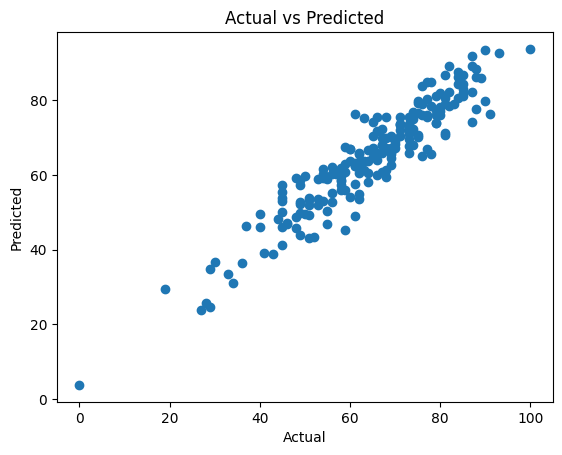

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Actual vs Predicted');

<Axes: xlabel='math score'>

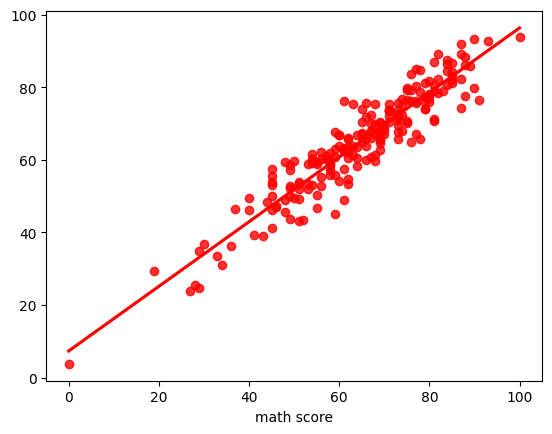

In [23]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

In [24]:
pred_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
